In [9]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#provide the path to the trajectory and prmtop files 

top='/home/rutika/nucleosome/production/wildtype/1kx5_015M_OPC.prmtop'
traj='/home/rutika/nucleosome/production/wildtype/1kx5_wild_015_unwrap_1us.dcd'
u = mda.Universe(top,traj)

In [14]:
# Select the two sets of residues from tail and DNA
residues_set1 = u.select_atoms("resid 660-686")
residues_set2 = u.select_atoms("resid 262-271") 
cutoff_distance = 4.5  # The distance cutoff value can be adjected dependig on the system needs
contacts = np.zeros((len(residues_set1.residues), len(residues_set2.residues)))# distance calculation between DNA and tail residues 
for i, res1 in enumerate(residues_set1.residues):
    for j, res2 in enumerate(residues_set2.residues):
        distances = mda.lib.distances.distance_array(res1.atoms.positions, res2.atoms.positions)
        contacts[i, j] = np.sum(distances < cutoff_distance)
contact_data = pd.DataFrame(contacts, index=[res1.resid for res1 in residues_set1.residues],
                             columns=[res2.resid for res2 in residues_set2.residues])# Save as a CSV file
contact_data.to_csv("contact_wt_shl5_1.csv")

In [15]:
a = len(residues_set1.residues)
b = len(residues_set2.residues)

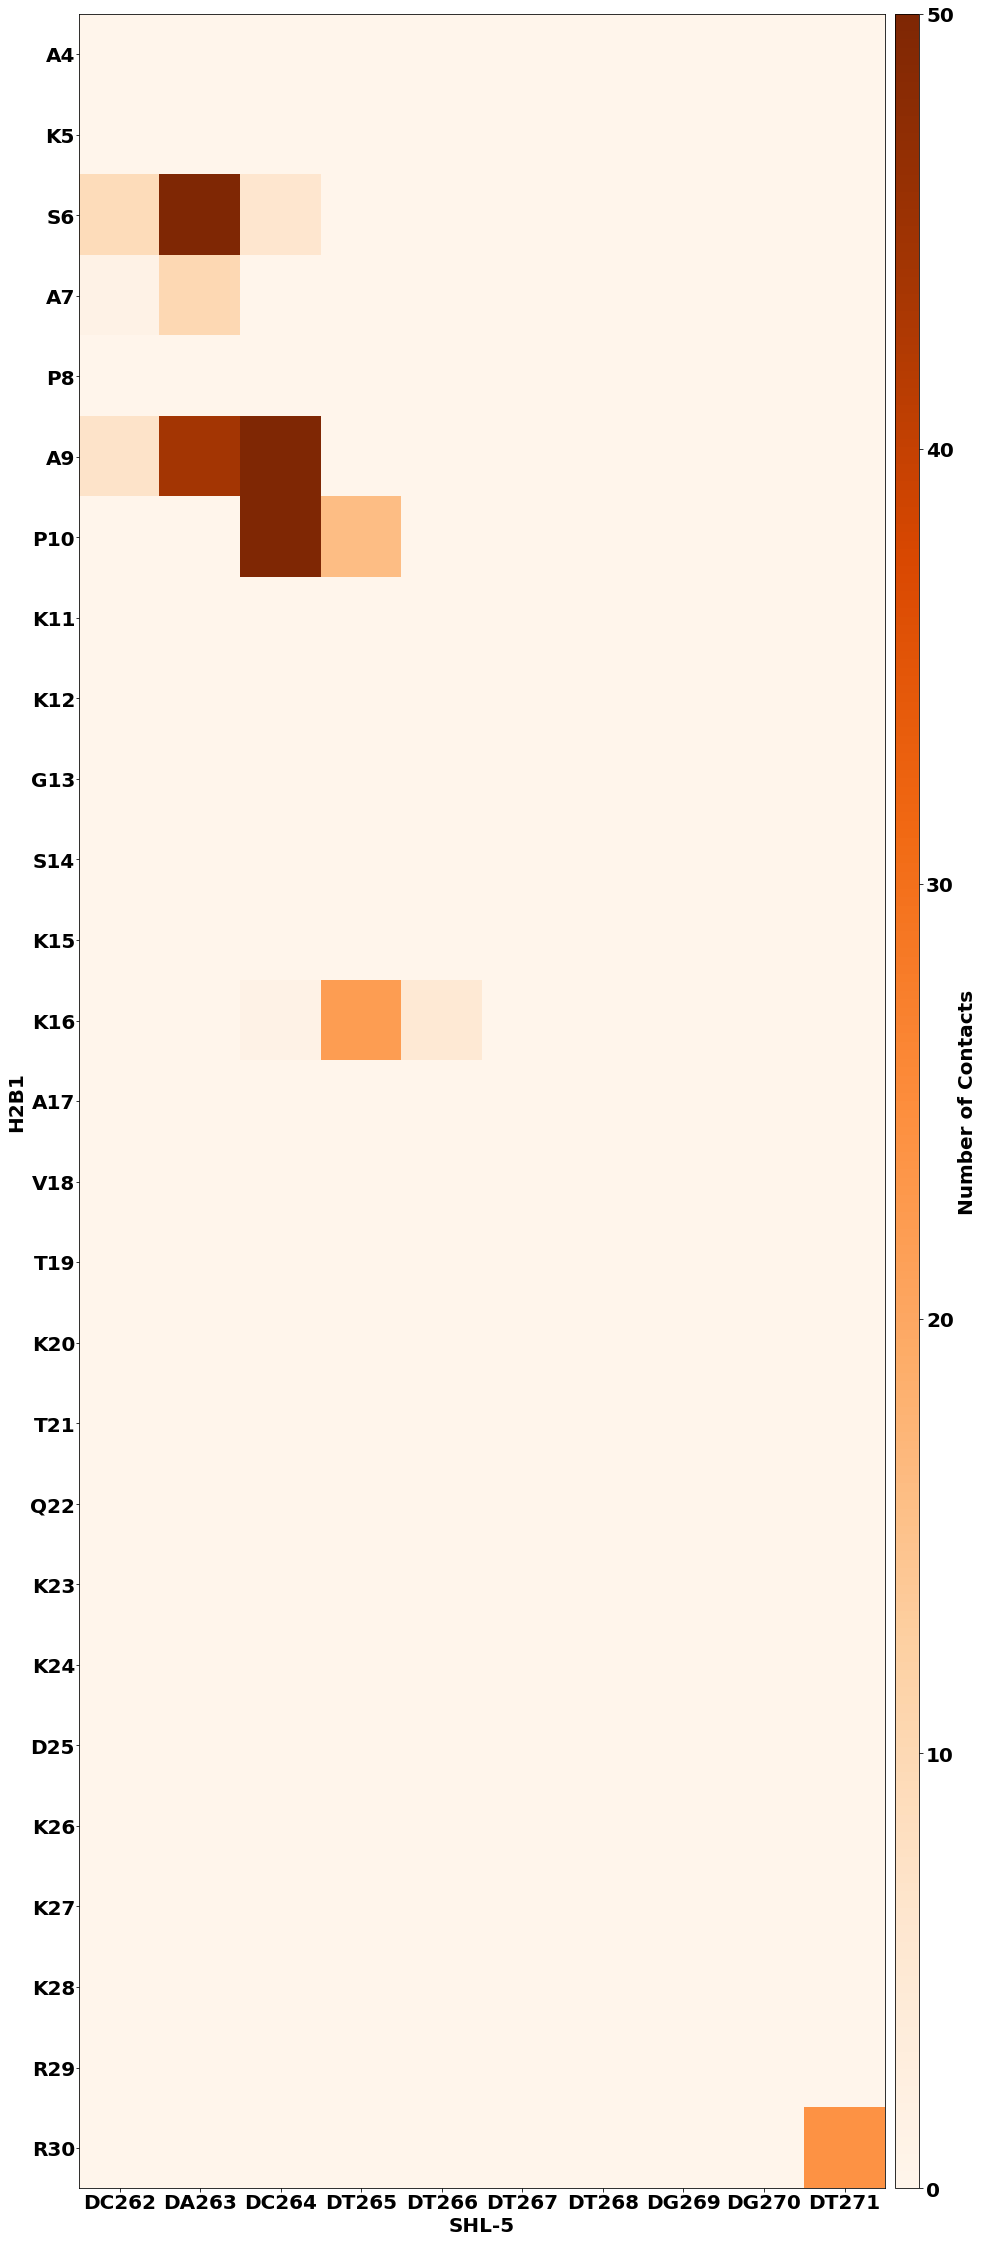

In [16]:
#plot the data 
import seaborn as sns
fig2, ax2 = plt.subplots(figsize=(18, 40))
im = ax2.imshow(contacts, origin='upper',  cmap = 'Oranges', vmin=0, vmax=50)
tick_interval =1
ax2.set_yticks(np.arange(a)[::tick_interval])
ax2.set_xticks(np.arange(b)[::tick_interval])
SHL5=['DC262', 'DA263', 'DC264', 'DT265', 'DT266', 'DT267', 'DT268', 'DG269', 'DG270', 'DT271']
H2B = ['A4','K5', 'S6', 'A7', 'P8', 'A9', 'P10', 'K11', 'K12', 'G13', 'S14', 'K15', 'K16', 'A17', 'V18','T19', 'K20', 'T21', 'Q22', 'K23', 'K24', 'D25', 'K26', 'K27', 'K28', 'R29', 'R30']
ax2.set_yticklabels(H2B)
ax2.set_xticklabels(SHL5)
plt.ylabel("H2B1", fontsize = 20.0, fontweight="bold")
plt.xlabel("SHL-5", fontsize = 20.0, fontweight="bold")
cbar2 = fig2.colorbar(im, pad = 0.01, aspect = 90)
cbar2.ax.set_ylabel('Number of Contacts', fontsize = 20.0)
cbar2.ax.tick_params(labelsize=20)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tick_params(labelsize=20, pad=1)
plt.savefig('WT_0.15M_H2B1_no.contact_shl5_1.svg', format="svg",transparent=True, dpi = 600)
plt.show()